# Tu primer árbol de decisión con scikit-learn

In [10]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [11]:
#Cargamos dataset a utilizar
df_raw = pd.read_csv('../data/raw/titanic.csv')

In [3]:
df_raw.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Exploración de datos

In [12]:
#Visualizacion del DataFrame
#Variable objetivo: Survived
df_raw.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [13]:
#Eliminamos las columnas que no nos interesan
#La variable Name y Fare no aportan informacion relevante para el modelo
columns_to_drop = ['Name', 'Fare']
df_raw = df_raw.drop(columns_to_drop, axis=1, inplace=False)


In [14]:
df_raw.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [15]:
#Renombramos las columnas
df_raw.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']


In [16]:
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [17]:
#Analizamos el shape del objeto
print(f'El DataFrame tiene {df_raw.shape[0]} filas y {df_raw.shape[1]} columnas')

El DataFrame tiene 887 filas y 6 columnas


In [18]:
#Visualizamos los tipos de datos
df_raw.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [19]:
#Cambiamos los tipos de datos
#Todos deben ser numericos
df_raw = pd.get_dummies(df_raw, drop_first=True)


In [20]:
df_raw.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male       bool
dtype: object

In [21]:
df_raw.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [22]:
#Reemplazar el DataFrame
df_raw.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [23]:
df_raw.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [24]:
#Ordenar columnas por nombres
df_raw = df_raw[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [25]:
#Separamos en X e y
X = df_raw.drop('Survived', axis=1)
y = df_raw['Survived']

In [26]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
#Arbol de Decision
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)

#Creacion del modelo
tree_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
#Entrenamiento


## Evaluación del modelo

In [28]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)


In [30]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en Train: {train_accuracy:.4f}')

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en Test: {test_accuracy:.4f}')


Accuracy en Train: 0.8065
Accuracy en Test: 0.7378


/tmp/ipykernel_5376/3019719258.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_names, y=importances, palette='bright', saturation=2, edgecolor='black', linewidth=2)


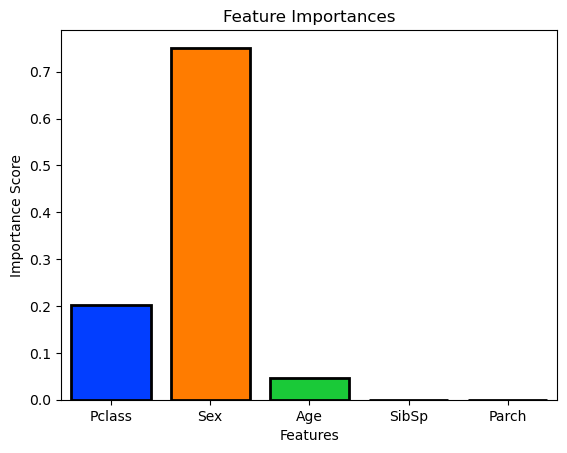

In [34]:
#Verificamos el feature importances
import seaborn as sns

importances = tree_model.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_names, y=importances, palette='bright', saturation=2, edgecolor='black', linewidth=2)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 